<center><h1 style="font-family: 'Georgia'; color: #f2f2f2; background-color:#800040; padding: 20px;">Exploratory Data Analysis: Text Message Spam Detection
    </h1></center>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
This is the exploratory data analysis for the 70-30 dataset.
</p>

In [66]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [67]:
#LOAD THE DATASET
df = pd.read_csv('../datasets/cleaned_datasets/dataset7030.csv') 
print(df.shape)
df.head()

(4306, 2)


,tag,message
0,ham,Shopping lor. Them raining mah hard 2 leave or...
1,ham,U still painting ur wall?
2,ham,"Lol, oh you got a friend for the dog ?"
3,ham,"Sure, if I get an acknowledgement from you tha..."
4,ham,I'm stuck in da middle of da row on da right h...


In [68]:
# LABEL ENCODE THE tag COLUMN
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['tag'] = encoder.fit_transform(df['tag'])

In [69]:
df.head() # ham is labeled 0, spam is tagged as 1

,tag,message
0,0,Shopping lor. Them raining mah hard 2 leave or...
1,0,U still painting ur wall?
2,0,"Lol, oh you got a friend for the dog ?"
3,0,"Sure, if I get an acknowledgement from you tha..."
4,0,I'm stuck in da middle of da row on da right h...


<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Raw Format</h1>

In [70]:
# EXTRACT NUMBER OF CHARACTERS 
df['num_chars_raw'] = df['message'].apply(len) # .apply() is a function that is applied to each row in a dataframe

#EXTRACT NUMBER OF WORDS
df['num_words_raw'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x))) # word by word separation

#EXTRACT NUMBER OF SENTENCES
df['num_sentences_raw'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x))) # sentence by sentence separation

df.head()

,tag,message,num_chars_raw,num_words_raw,num_sentences_raw
0,0,Shopping lor. Them raining mah hard 2 leave or...,52,11,2
1,0,U still painting ur wall?,25,6,1
2,0,"Lol, oh you got a friend for the dog ?",38,11,1
3,0,"Sure, if I get an acknowledgement from you tha...",120,23,1
4,0,I'm stuck in da middle of da row on da right h...,67,18,1


In [71]:
df.describe()

,tag,num_chars_raw,num_words_raw,num_sentences_raw
count,4306.000000,4306.000000,4306.000000,4306.000000
mean,0.300046,89.891779,20.219693,2.139805
std,0.458331,59.873284,13.218227,1.443141
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,41.000000,10.000000,1.000000
50%,0.000000,76.000000,18.000000,2.000000
75%,1.000000,135.000000,28.000000,3.000000
max,1.000000,790.000000,220.000000,28.000000


In [72]:
#LETS GET THE BASIC STATISTICAL SUMMARY OF HAM MESSAGES
df[df['tag'] == 0][['num_chars_raw', 'num_words_raw', 'num_sentences_raw']].describe()

,num_chars_raw,num_words_raw,num_sentences_raw
count,3014.000000,3014.000000,3014.000000
mean,70.619443,17.201725,1.811546
std,55.170997,13.481452,1.298849
min,3.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,790.000000,220.000000,28.000000


In [73]:
#LETS GET THE BASIC STATISTICAL SUMMARY OF SPAM MESSAGES
df[df['tag'] == 1][['num_chars_raw', 'num_words_raw', 'num_sentences_raw']].describe()

,num_chars_raw,num_words_raw,num_sentences_raw
count,1292.000000,1292.000000,1292.000000
mean,134.850619,27.260062,2.905573
std,44.273428,9.358702,1.472832
min,9.000000,2.000000,1.000000
25%,112.750000,23.000000,2.000000
50%,140.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,471.000000,118.000000,14.000000


<p style="font-family: 'Georgia'; font-size: 15px; font-weight: 400; color: #800040;">
We can see that spam messages tend to have longer content, considering mean values of number of chars, words, and sentences. Spam messages are more consistent in content lenght than ham messages as shown in their standard deviations.
</p>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    Visualize the ham vs spam differences in number of characters.
</p>

<Axes: xlabel='num_chars_raw', ylabel='Count'>

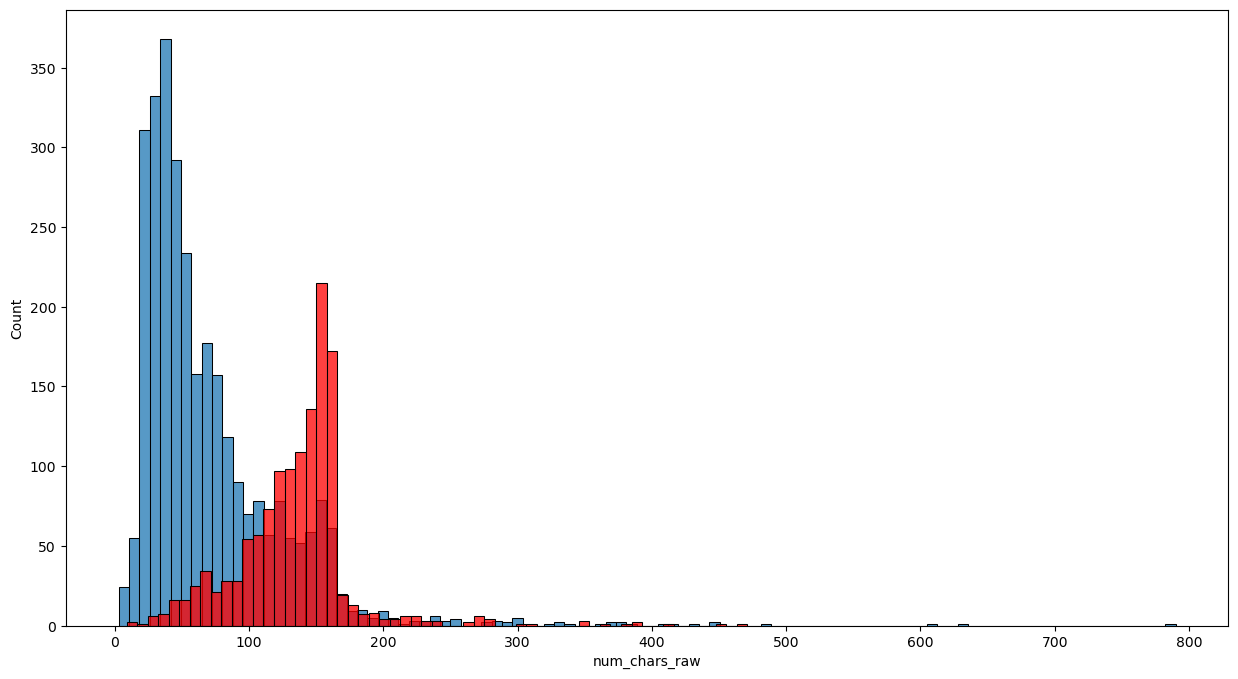

In [74]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['tag'] == 0]['num_chars_raw'])
sns.histplot(df[df['tag'] == 1]['num_chars_raw'], color="red")

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    Visualize the ham vs spam differences in number of words.
</p>

<Axes: xlabel='num_words_raw', ylabel='Count'>

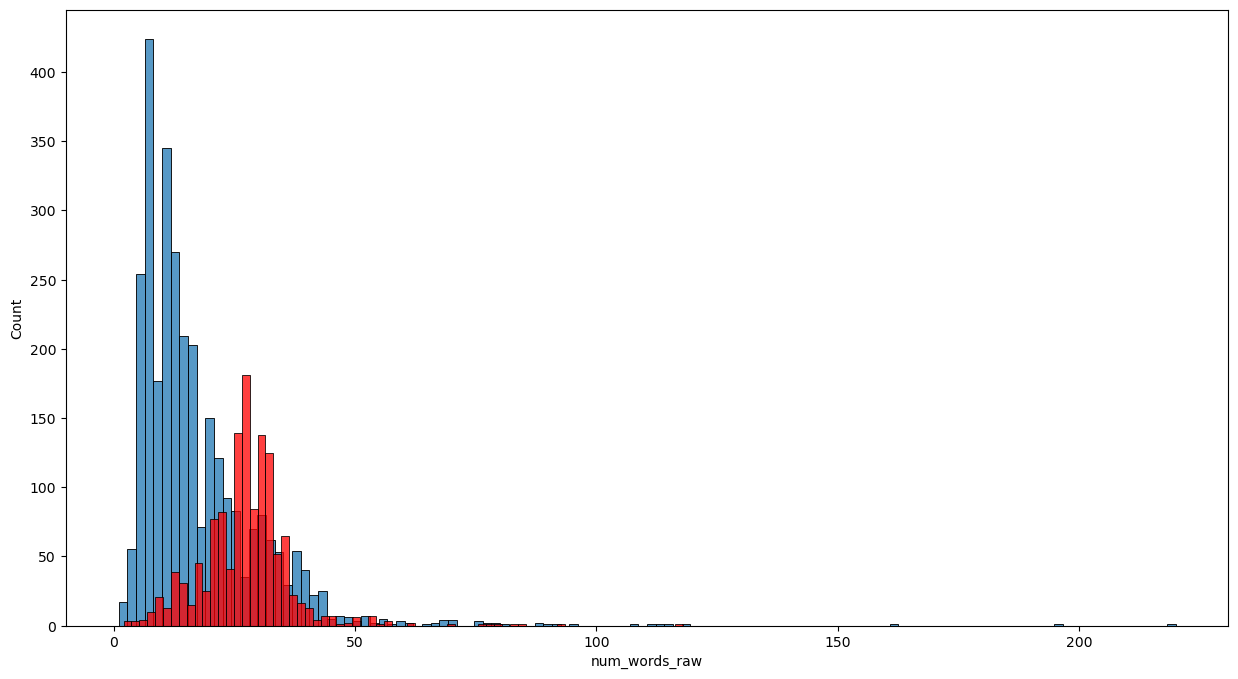

In [75]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['tag'] == 0]['num_words_raw'])
sns.histplot(df[df['tag'] == 1]['num_words_raw'], color="red")

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    Pairplot Visualization.
</p>

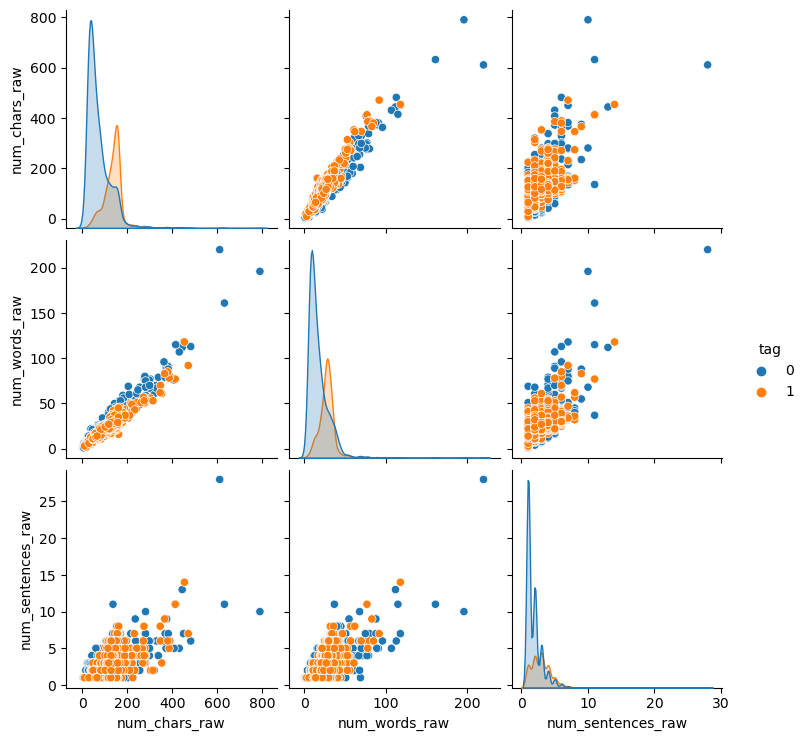

In [76]:
sns.pairplot(df, hue='tag')

<p style="font-family: 'Georgia'; font-size: 15px; font-weight: 400; color: #800040;">
There is very litte difference in the trends of ham and spam messages in our dataset.
</p>

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Transformed Format</h1>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    Steps in transforming the raw data.
</p>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    <ol>
        <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040; font-style: italic">
            Lower case</li>
        <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040; font-style: italic">
            Tokenization</li>
        <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040; font-style: italic">
            Removal of special characters</li>
        <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040; font-style: italic">
            Removing stopwords and punctuation</li>
        <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040; font-style: italic">Stemming</li>
    </ol>
</p>

In [77]:
# DOWNLOAD THE STOPWORDS LIST
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dexter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

#CREATE A FUNCTION THAT WILL TRANSFORM THE TEXT FROM THE DATAFRAME
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    # first processing stage: removing nonalphanumeric tokens (@, %, *...)
    for i in text: 
        if i.isalnum():
            y.append(i)

    text = y[:] # text variable is updated with the content of y
    y.clear() # y is cleared for next processing stage
    
    # second processing stage: if the word has an english meaning, we add it to y. Remember, y is now cleared.
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:] # text variable is updated with the content of y
    y.clear() # y is cleared for next processing stage
    
    # third processing stage: stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [79]:
# TESTING THE CODE
print('sample data point:         ', df['message'][92])
transform_8 = transform_text(df['message'][92])
print('transformed data point:    ', transform_8)
print()

sample data point:          I am literally in bed and have been up for like  &lt;#&gt;  hours
transformed data point:     liter bed like lt gt hour



In [80]:
# APPLY THE FUNCTION TO EACH ROW AND THEN CREATE A message_transformed COLUMN
df['message_transformed'] = df['message'].apply(transform_text)
df.head()

,tag,message,num_chars_raw,num_words_raw,num_sentences_raw,message_transformed
0,0,Shopping lor. Them raining mah hard 2 leave or...,52,11,2,shop lor rain mah hard 2 leav orchard
1,0,U still painting ur wall?,25,6,1,u still paint ur wall
2,0,"Lol, oh you got a friend for the dog ?",38,11,1,lol oh got friend dog
3,0,"Sure, if I get an acknowledgement from you tha...",120,23,1,sure get acknowledg astoundingli tactless gene...
4,0,I'm stuck in da middle of da row on da right h...,67,18,1,stuck da middl da row da right hand side da lt


In [81]:
# RECOUNT THE NUMBER OF CHARACTERS, WORDS, AND SENTENCES ON THE TRANSFORMED TEXTS
df['num_chars_transformed'] = df['message_transformed'].apply(len)
df['num_words_transformed'] = df['message_transformed'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences_transformed'] = df['message_transformed'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,tag,message,num_chars_raw,num_words_raw,num_sentences_raw,message_transformed,num_chars_transformed,num_words_transformed,num_sentences_transformed
0,0,Shopping lor. Them raining mah hard 2 leave or...,52,11,2,shop lor rain mah hard 2 leav orchard,37,8,1
1,0,U still painting ur wall?,25,6,1,u still paint ur wall,21,5,1
2,0,"Lol, oh you got a friend for the dog ?",38,11,1,lol oh got friend dog,21,5,1
3,0,"Sure, if I get an acknowledgement from you tha...",120,23,1,sure get acknowledg astoundingli tactless gene...,74,11,1
4,0,I'm stuck in da middle of da row on da right h...,67,18,1,stuck da middl da row da right hand side da lt,46,11,1


In [82]:
df.describe()

,tag,num_chars_raw,num_words_raw,num_sentences_raw,num_chars_transformed,num_words_transformed,num_sentences_transformed
count,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000,4306.000000
mean,0.300046,89.891779,20.219693,2.139805,51.532048,9.775894,0.998607
std,0.458331,59.873284,13.218227,1.443141,36.214999,6.598010,0.037307
min,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,10.000000,1.000000,23.000000,5.000000,1.000000
50%,0.000000,76.000000,18.000000,2.000000,43.000000,8.000000,1.000000
75%,1.000000,135.000000,28.000000,3.000000,76.000000,14.000000,1.000000
max,1.000000,790.000000,220.000000,28.000000,389.000000,76.000000,1.000000


<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    A significant decrease in the number of characters, words, and sentences can be seen after preprocessing the data.
</p>

In [83]:
# LIST ALL THE HAM WORDS IN TRANSFORMED MESSAGES
ham_collection = []
for message in df[df['tag'] == 0]['message_transformed'].tolist(): # a list of all ham messages
    for word in message.split(): # splitting each ham message to words
        ham_collection.append(word)
        
print(len(ham_collection))

23694


In [84]:
# LIST ALL THE SPAM WORDS IN TRANSFORMED MESSAGES
spam_collection = []
for message in df[df['tag'] == 1]['message_transformed'].tolist(): # a list of all ham messages
    for word in message.split(): # splitting each ham message to words
        spam_collection.append(word)
        
print(len(spam_collection))

18401


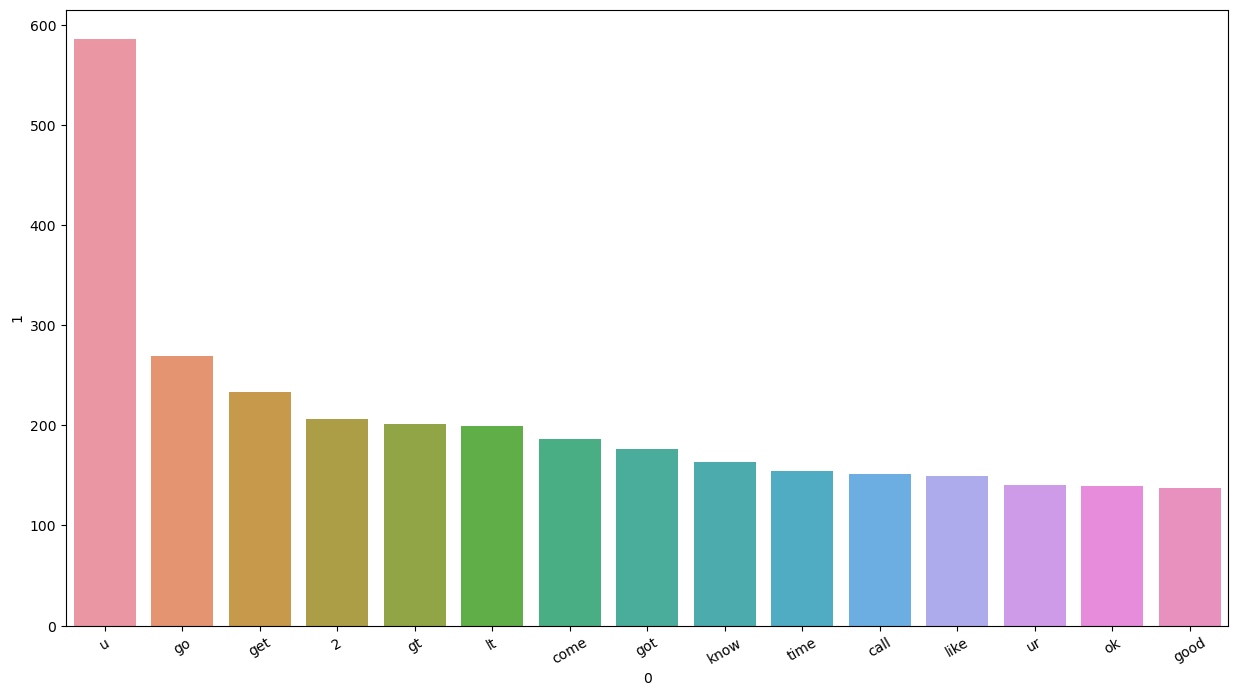

In [85]:
# MOST APPEARING WORDS IN HAM COLLECTION
from collections import Counter
plt.figure(figsize=(15, 8))
sns.barplot(x = pd.DataFrame(Counter(ham_collection).most_common(15))[0], 
            y = pd.DataFrame(Counter(ham_collection).most_common(15))[1])
plt.xticks(rotation=30)
plt.show()

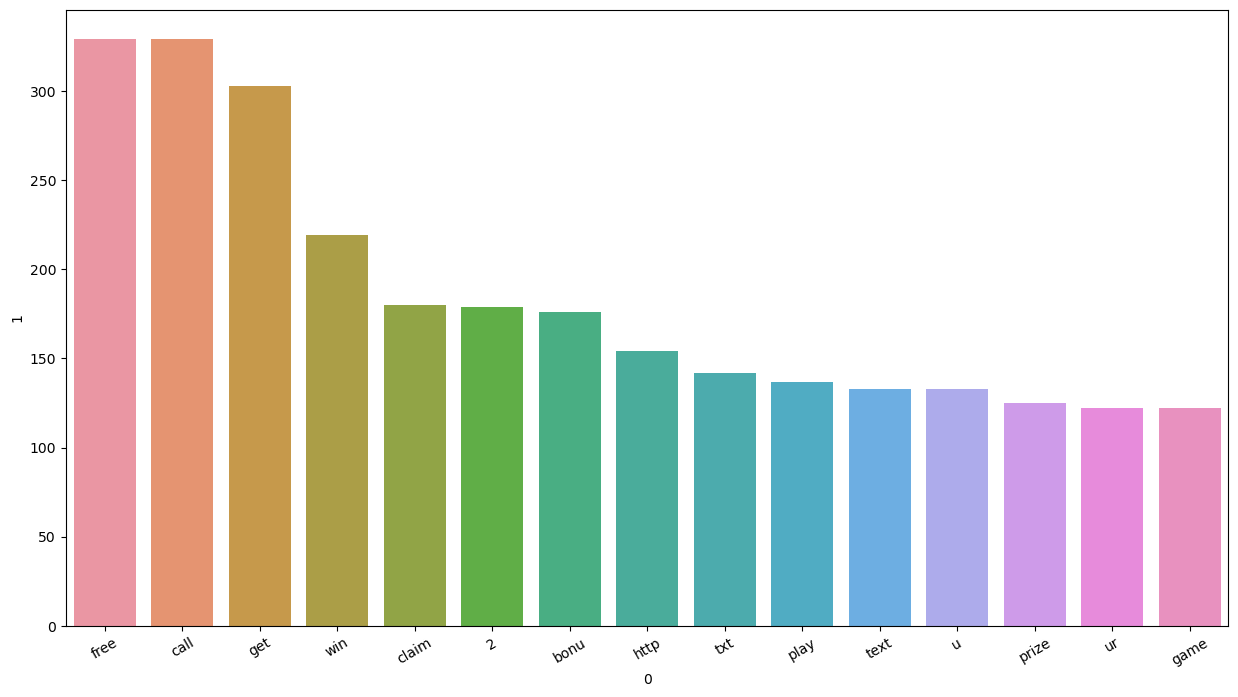

In [86]:
# MOST APPEARING WORDS IN SPAM COLLECTION
from collections import Counter
plt.figure(figsize=(15, 8))
sns.barplot(x = pd.DataFrame(Counter(spam_collection).most_common(15))[0], 
            y = pd.DataFrame(Counter(spam_collection).most_common(15))[1])
plt.xticks(rotation=30)
plt.show()

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    We are done exploring the data. Let's now save the dataset that we need in training. The only columns that we need are tag and message_transformed.
</p>

In [87]:
df.columns

Index(['tag', 'message', 'num_chars_raw', 'num_words_raw', 'num_sentences_raw',
       'message_transformed', 'num_chars_transformed', 'num_words_transformed',
       'num_sentences_transformed'],
      dtype='object')

In [88]:
final_df = df.iloc[:, [0,5]]

final_df.to_csv('../datasets/training_datasets/training_data7030.csv', index=False)
print('file created!')

file created!


tag                    0
message_transformed    0
dtype: int64